In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = '/project2/kribelba_1515/data/EXTRA_seq/2024_data/uniEXTRA_lib6p0/barcode23_6p0uniExtraHub4p75_mapping_nanopore.tsv'
data_path2 = '/project2/kribelba_1515/data/EXTRA_seq/2024_data/uniEXTRA_lib6p0/barcode24_6p0b_uniExtraHub4p75_map_nano.tsv'

In [3]:
mapping = pd.read_csv(data_path, sep='\t')
mapping2 = pd.read_csv(data_path2, sep='\t')

In [4]:
valid_chars = {'A', 'T', 'G', 'C'}

def clean_mapping(df):
 if 'Read_name' in df.columns:
  df.drop('Read_name', inplace=True, axis=1)
 mapping = df.rename(columns={'Reference': 'Enhancer_ID','BC_sequence': 'Enhancer_Seq', 'TF_sequence': 'Barcode_Seq'})
 mapping = mapping.dropna(subset=['Barcode_Seq'])  # remove any NaN barcodes
 mapping = mapping[
    (mapping['Barcode_Seq'].str.len() == 12) & 
    (mapping['Barcode_Seq'].apply(lambda x: set(x).issubset(valid_chars)))]
 return mapping

In [5]:
mapping_cleaned = clean_mapping(mapping)
mapping2_cleaned = clean_mapping(mapping2)

In [55]:
mapping2_cleaned

,Enhancer_ID,Enhancer_Seq,Barcode_Seq
0,rd_1,CGT-A-AGAACGCTCAAGAATCAATATGAATATCGCTCAGAC-TGG...,CCAGCTGAGATG
1,rd_1,CGTGAGAGAACGCTTCAAGAATCAATATGAATATCGCTC-GACTTG...,TTATAATGCCCC
2,rd_1,CGT-AAAGAACGCTCAAGAATCAATATGAATATCGCTCAGACTTGG...,GGCTCAATGTGC
4,rd_1,CGT-AGAGAACGCTCAAGAATCAATATGAATATCGCTCAGACTTGG...,AAATTCAATGGT
5,rd_1,CGT-AGAGAACACTTCAAGAATCAATATGAATATCGCTCAGACTTG...,TAAATATGCAAT
...,...,...,...
337278,FOXO_MEF2_FOXO_3,----------------------------------------------...,CATTCCTAACTC
337279,FOXO_MEF2_FOXO_3,----------------------------------------------...,CGTGGACACAAG
337281,FOXO_MEF2_FOXO_3,----------------------------------------------...,CATGCATCGCTG
337282,FOXO_MEF2_FOXO_3,----------------------------------------------...,GCCACATAACAG


In [6]:
print(mapping_cleaned['Barcode_Seq'].nunique())
# there is a total of 236477 unique barcodes in the first mapping file

print(mapping2_cleaned['Barcode_Seq'].nunique())
# there is a total of 88776 unique barcodes in the first mapping file

236477
88776


In [7]:
def group_enhancers_and_barcodes(df):
 # count occurrences of each barcode per Enhancer_ID
 barcode_counts = df.groupby(['Barcode_Seq', 'Enhancer_ID']).size().reset_index(name='count') # pivot without enhancer_seq

 # this is just pivotting as Excel, where rows are barcodes, columns are Enhancer_IDs, and values are group counts
 result_df = barcode_counts.pivot_table(index='Barcode_Seq', 
                                       columns='Enhancer_ID', 
                                       values='count', 
                                       fill_value=0)
 result_df = result_df.reset_index()
 result_df.columns.name = None
 return result_df

In [8]:
mapping = group_enhancers_and_barcodes(mapping_cleaned)
mapping2 = group_enhancers_and_barcodes(mapping2_cleaned)

In [9]:
print(len(mapping))
# there is a total of 236477 barcodes!

# all of which are unique.
print(mapping['Barcode_Seq'].nunique())

print(len(mapping2))
# there is a total of 88776 barcodes!

# all of which are unique.
print(mapping2['Barcode_Seq'].nunique())

236477
236477
88776
88776


In [53]:
mapping2

,Barcode_Seq,CTCF_1,CTCF_2,CTCF_3,CTCF_CTCF_1,CTCF_CTCF_2,CTCF_CTCF_3,CTCF_CTCF_CTCF_1,CTCF_CTCF_CTCF_2,CTCF_CTCF_CTCF_3,...,RUNX3_RUNX3_RUNX3_3,RUNX3_RUNX3_RUNX3_RUNX3_1,RUNX3_RUNX3_RUNX3_RUNX3_2,RUNX3_RUNX3_RUNX3_RUNX3_3,RUNX3_RUNX3_RUNX3_RUNX3_RUNX3_1,RUNX3_RUNX3_RUNX3_RUNX3_RUNX3_2,RUNX3_RUNX3_RUNX3_RUNX3_RUNX3_3,rd_1,rd_2,rd_3
0,AAAAAAAAAAAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAAAAAAAAAAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAAAAAAAAAAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAAAAAAAAACG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAAAAAAAAAGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88771,TTTTTTTAATCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88772,TTTTTTTAATTG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88773,TTTTTTTACTAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88774,TTTTTTTAGCGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# mapping.to_csv('mapping_filtered.tsv', sep='\t', index=False)
mapping2.to_csv('mapping2_filtered.tsv', sep='\t', index=False)

In [18]:
def filter_barcodes(df, filtration_method='max_fraction', max_fraction_threshold=0.5, ratio_threshold=2):

    df_filtered = df.copy()
    numeric_cols = df_filtered.columns[1:]

    # summing the count of barcodes across all enhancer_ids
    df_filtered['Total_Mapping_Counts'] = df_filtered[numeric_cols].sum(axis=1)

    # find the enhancer_id with the highest count for each barcode
    df_filtered['Max_Mapping_Count'] = df_filtered[numeric_cols].max(axis=1)

    # the second maximum count to use it in the max/second max ratio later
    df_filtered['Second_Max_Mapping_Count'] = df_filtered[numeric_cols].apply(lambda row: sorted(row, reverse=True)[1], axis=1)

    # calculate ratio (avoid division by zero by assigning infinity to uniquely mapped barcode)
    df_filtered['Ratio'] = np.where(
        df_filtered['Second_Max_Mapping_Count'] > 0, 
        df_filtered['Max_Mapping_Count'] / df_filtered['Second_Max_Mapping_Count'], 
        np.inf
    )

    # calculate the fraction of the maximum. if the barcode is found a total of 100 times, out of which the max enhancer_id count is 40, then that max fraction is 0.4
    df_filtered['Max_Mapping_Fraction'] = df_filtered['Max_Mapping_Count'] / df_filtered['Total_Mapping_Counts']

    # identify enhancer_ids with the max count for each barcode. this is important because I will filter out ties (or barcodes that have equally represented 
    df_filtered['Max_Mapping_Count_Instances'] = (df_filtered[numeric_cols] == df_filtered['Max_Mapping_Count'].values[:, None]).sum(axis=1)

    # find the enhancer_id with the max count
    df_filtered['Enhancer'] = df_filtered[numeric_cols].idxmax(axis=1)

    # apply filtering criteria:
    # keep rows where Max_Fraction >= 0.5
    # - ensure max fraction appears only once (no ties) to ensure that every barcode is uniquely mapped
    if filtration_method == 'max_fraction':
        df_filtered = df_filtered[(df_filtered['Max_Mapping_Fraction'] >= max_fraction_threshold) & (df_filtered['Max_Mapping_Count_Instances'] == 1)]
    elif filtration_method == 'ratio':
        df_filtered = df_filtered[df_filtered['Ratio'] >= ratio_threshold]
    else:
        raise ValueError("Invalid filtration_method. Choose 'max_fraction' or 'ratio'.")

    df_filtered.reset_index(drop=True, inplace=True)

    return df_filtered


In [19]:
# df_filtered_max_fraction_05 = filter_barcodes(mapping, 'max_fraction', 0.5) # 226,231
# df_filtered_max_fraction_04 = filter_barcodes(mapping, 'max_fraction', 0.4) # 226,923
# df_filtered_max_fraction_03 = filter_barcodes(mapping, 'max_fraction', 0.3) # 227,115
# df_filtered_ratio_3 = filter_barcodes(mapping, 'ratio', 0.5, 3) # 213,732
# df_filtered_ratio_2 = filter_barcodes(mapping, 'ratio', 0.5, 2) # 224,300
# df_filtered_ratio_15 = filter_barcodes(mapping, 'ratio', 0.5, 1.5) # 226,625
# df_filtered_ratio_1 = filter_barcodes(mapping, 'ratio', 0.5, 1) # 236,477

df_filtered_ratio_3_mapping2 = filter_barcodes(mapping2, 'ratio', 0.5, 3) # 83290
df_filtered_ratio_2_mapping2 = filter_barcodes(mapping2, 'ratio', 0.5, 2) # 85689

/tmp/SLURM_979132/ipykernel_967415/3980080666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_visualization["Ratio"] = df_for_visualization["Ratio"].replace(np.inf, max_ratio * 1.1) # rescaling infinite values to max*1.1 and later highlighting them with red


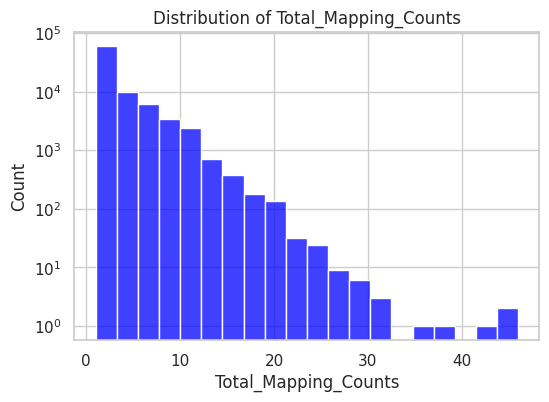

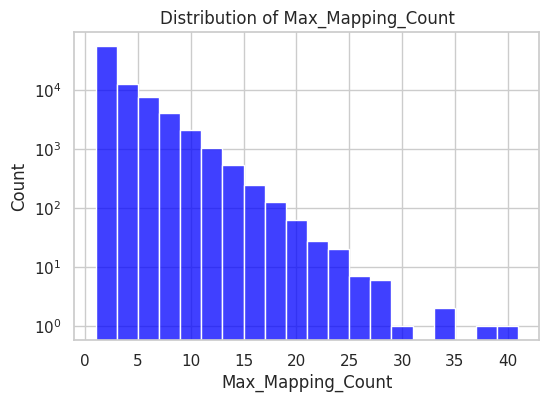

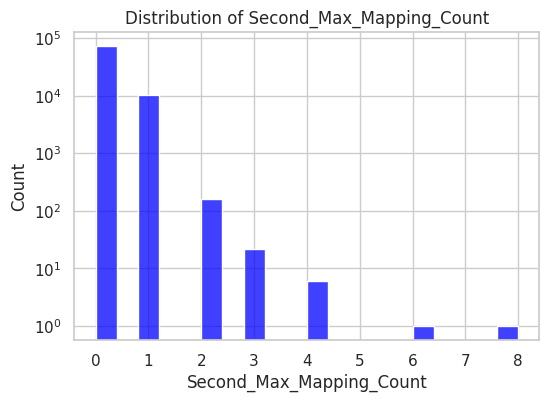

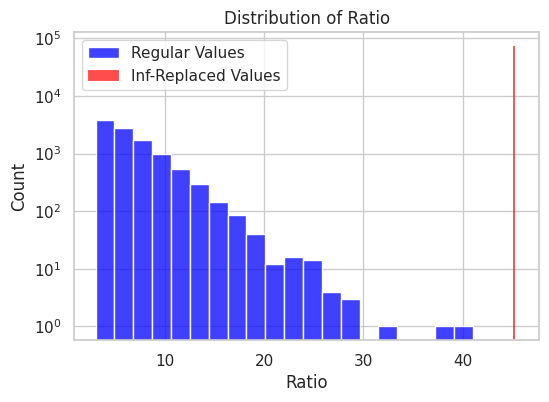

In [46]:
df_for_visualization = df_filtered_ratio_3_mapping2[['Barcode_Seq', 'Total_Mapping_Counts', 'Max_Mapping_Count', 'Second_Max_Mapping_Count', 'Ratio', 'Max_Mapping_Fraction', 'Enhancer']]
max_ratio = df_for_visualization[np.isfinite(df_for_visualization["Ratio"])]["Ratio"].max()
df_for_visualization["Ratio"] = df_for_visualization["Ratio"].replace(np.inf, max_ratio * 1.1) # rescaling infinite values to max*1.1 and later highlighting them with red

numerical_columns = ["Total_Mapping_Counts", "Max_Mapping_Count", "Second_Max_Mapping_Count", "Ratio"]

sns.set(style="whitegrid")

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    
    # recording the "inf" values of the ratio column to color them as red later
    special_values = None
    if col == "Ratio":
        special_values = df_for_visualization[df_for_visualization[col] == max_ratio * 1.1][col]
        regular_values = df_for_visualization[df_for_visualization[col] != max_ratio * 1.1][col]
    else:
        regular_values = df_for_visualization[col]
    

    sns.histplot(regular_values, bins=20, color='blue', label='Regular Values', log_scale=False)


    if special_values is not None and not special_values.empty:
        sns.histplot(special_values, bins=8, color='red', label='Inf-Replaced Values', alpha=0.7, log_scale=False)
        plt.legend()

    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")        
    plt.xticks()
    plt.yticks()
    plt.yscale("log")
    plt.show()

/tmp/SLURM_979132/ipykernel_967415/2672150156.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=enhancer_counts[:20].values, y=enhancer_counts[:20].index, palette="viridis")


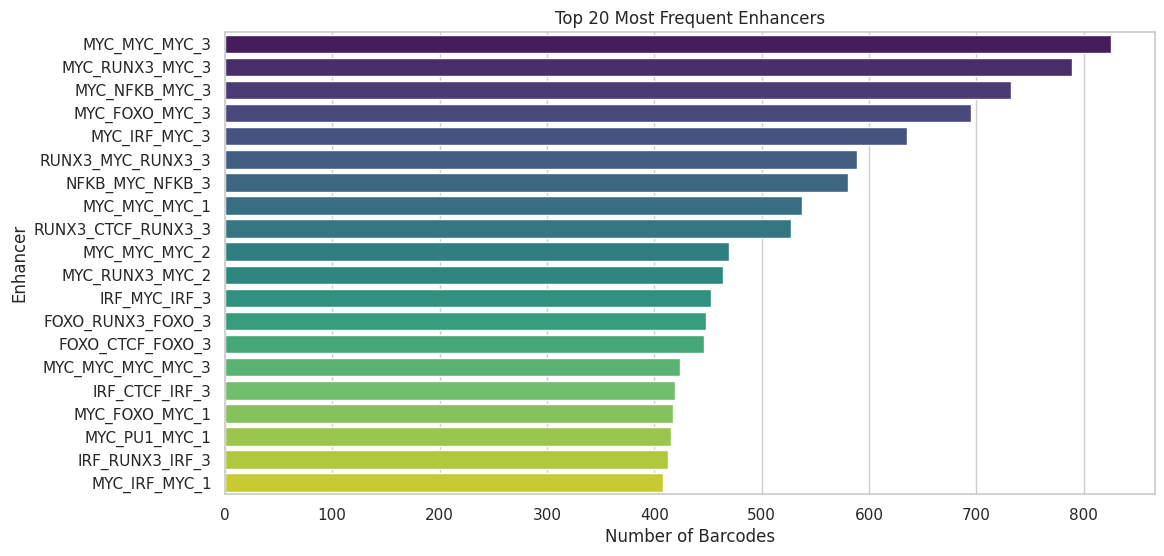

In [47]:
# checking the distribution of the top 20 enhancers
enhancer_counts = df_for_visualization["Enhancer"].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=enhancer_counts[:20].values, y=enhancer_counts[:20].index, palette="viridis")
plt.xlabel("Number of Barcodes")
plt.ylabel("Enhancer")
plt.title("Top 20 Most Frequent Enhancers")
plt.show()

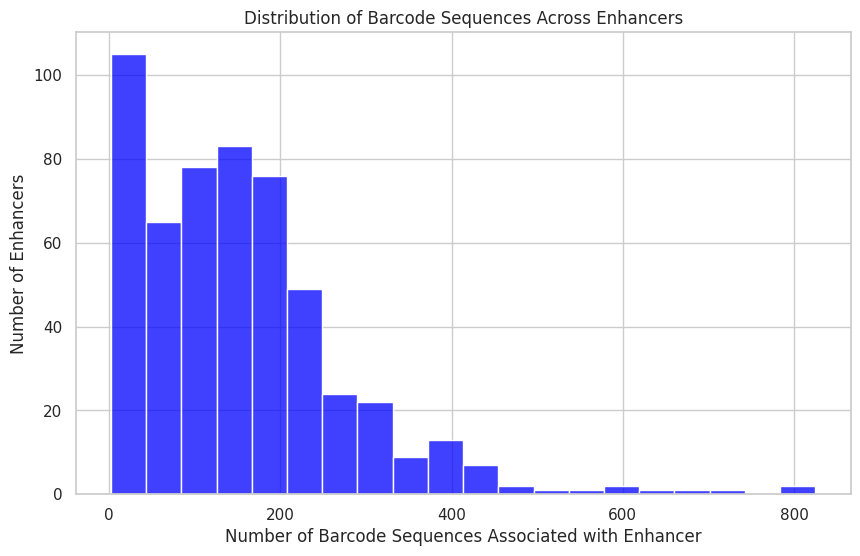

In [48]:
enhancer_counts = df_for_visualization['Enhancer'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(enhancer_counts.values, bins=20, color='blue', kde=False)

# Set labels and title
plt.xlabel('Number of Barcode Sequences Associated with Enhancer')
plt.ylabel('Number of Enhancers')
plt.title('Distribution of Barcode Sequences Across Enhancers')

plt.xticks()
plt.yticks()
plt.show()


In [51]:
barcode_mapping = df_filtered_ratio_3_mapping2[['Barcode_Seq', 'Total_Mapping_Counts', 'Max_Mapping_Fraction', 'Ratio', 'Enhancer']]

In [52]:
barcode_mapping

,Barcode_Seq,Total_Mapping_Counts,Max_Mapping_Fraction,Ratio,Enhancer
0,AAAAAAAAAATC,1.0,1.0,inf,MYC_MEF2_MYC_3
1,AAAAAAAAAATG,3.0,1.0,inf,RUNX3_PU1_2
2,AAAAAAAAACAA,2.0,1.0,inf,CTCF_PU1_3
3,AAAAAAAAACAC,2.0,1.0,inf,MYC_MEF2_3
4,AAAAAAAAACAG,1.0,1.0,inf,MEF2_NFKB_3
...,...,...,...,...,...
83285,TTTTTTTAAAGG,1.0,1.0,inf,NFKB_MEF2_3
83286,TTTTTTTAATCT,5.0,0.8,4.0,FOXO_IRF_FOXO_2
83287,TTTTTTTAATTG,2.0,1.0,inf,FOXO_IRF_FOXO_2
83288,TTTTTTTACTAA,2.0,1.0,inf,NFKB_MYC_NFKB_3


In [41]:
barcode_mapping.to_csv('barcode_enhancer_mapping.tsv', sep='\t', index=False)